# Linear regression with tensorflow

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
x_data=np.random.rand(100).astype(np.float32)

In [3]:
y_data= x_data * 3 + 2
y_data= np.vectorize(lambda y: y + np.random.normal(loc=0.0, scale=0.1))(y_data)
#y_data=np.vectorizer(lambda y: y + np.random.normal(loc=0.0, scale= 0.1))(y_data)
#zip(x_data, y_data)[0:3]

In [4]:
a=tf.Variable(1.0)
b=tf.Variable(2.0)
y=a * x_data + b


In [5]:
loss=tf.reduce_mean(tf.square(y-y_data))

In [6]:
optimizer=tf.train.GradientDescentOptimizer(0.5)
train=optimizer.minimize(loss)

In [10]:
init=tf.global_variables_initializer()
sess=tf.Session()
sess.run(init)

In [11]:
train_data = []
for step in range(100):
    evals = sess.run([train,a,b])[1:]
    if step % 5 == 0:
        print(step, evals)
        train_data.append(evals)

0 [1.6666656, 2.9988396]
5 [1.9629328, 2.5508173]
10 [2.2629495, 2.3901112]
15 [2.4787102, 2.2742388]
20 [2.6339667, 2.1908598]
25 [2.7456858, 2.1308622]
30 [2.8260765, 2.0876894]
35 [2.8839238, 2.056623]
40 [2.9255495, 2.0342684]
45 [2.9555025, 2.0181825]
50 [2.977056, 2.0066073]
55 [2.9925654, 1.9982781]
60 [3.0037255, 1.9922847]
65 [3.011756, 1.9879721]
70 [3.0175347, 1.9848686]
75 [3.021693, 1.9826355]
80 [3.0246851, 1.9810286]
85 [3.0268383, 1.9798723]
90 [3.0283875, 1.9790403]
95 [3.0295024, 1.9784415]


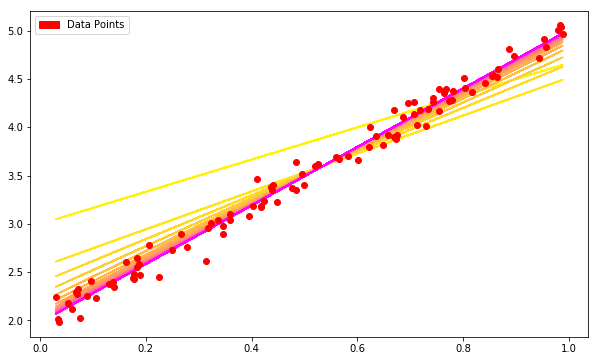

In [13]:
converter = plt.colors
cr, cg, cb = (1.0, 1.0, 0.0)
for f in train_data:
    cb += 1.0 / len(train_data)
    cg -= 1.0 / len(train_data)
    if cb > 1.0: cb = 1.0
    if cg < 0.0: cg = 0.0
    [a, b] = f
    f_y = np.vectorize(lambda x: a*x + b)(x_data)
    line = plt.plot(x_data, f_y)
    plt.setp(line, color=(cr,cg,cb))

plt.plot(x_data, y_data, 'ro')


green_line = mpatches.Patch(color='red', label='Data Points')

plt.legend(handles=[green_line])

plt.show()


[None]

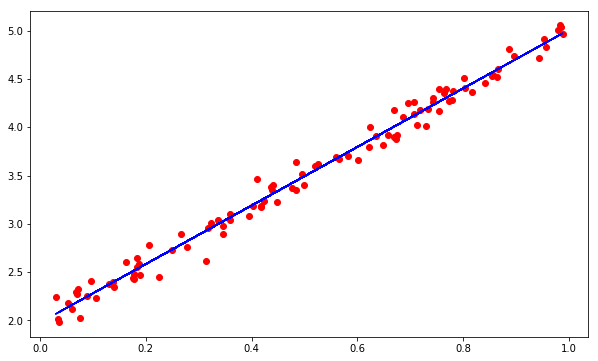

In [14]:
plt.plot(x_data,y_data,'ro')
f_y = np.vectorize(lambda x: a*x + b)(x_data)
line = plt.plot(x_data, f_y)
plt.setp(line, color='b')
